In [2]:
using Pkg
using Interpolations

┌ Info: Recompiling stale cache file C:\Users\hasti\.julia\compiled\v1.1\Interpolations\VpKVx.ji for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1184


In [3]:
using NRRD
using PyPlot
using FileIO

┌ Info: Recompiling stale cache file C:\Users\hasti\.julia\compiled\v1.1\NRRD\QVxCn.ji for NRRD [9bb6cfbd-7763-5393-b1b5-1c8e09872146]
└ @ Base loading.jl:1184


In [4]:
img = load("F:\\pancreas-ct\\converted_from_dicom\\Pancreas_15.nrrd")
0

0

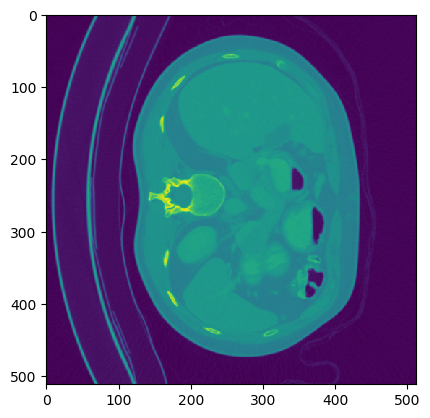

PyObject <matplotlib.image.AxesImage object at 0x0000000041E28208>

In [5]:
imshow(img.data[:, :,156])

In [6]:
img.axes

(AxisArrays.Axis{:L,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(0.0:0.703125:359.296875), AxisArrays.Axis{:P,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(0.0:-0.703125:-359.296875), AxisArrays.Axis{:S,StepRange{Int64,Int64}}(0:-1:-309))

In [7]:
chosenPoint = img.axes[1]

AxisArrays.Axis{:L,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(0.0:0.703125:359.296875)

In [8]:
using AxisArrays
ar = img[Axis{:L}(250)].data

512×310 Array{Int16,2}:
 -1024  -1024  -1024  -1024  -1024  …  -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024  …  -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024  …  -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
 -1024  -1024  -1024  -1024  -1024     -1024  -1024  -1024  -1024  -1024
     ⋮                     

In [9]:
using StaticArrays

In [11]:
interp = extrapolate(interpolate(img.data, BSpline(Linear())), -1000)


512×512×310 extrapolate(interpolate(::Array{Float64,3}, BSpline(Linear())), -1000) with element type Float64:
[:, :, 1] =
 -1024.0  -1024.0  -1024.0  -1024.0  …  -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0  …  -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0  …  -1024.0  -1024.0  -1024.0  -1024.0
 -1024.0  -1024.0  -1024.0  -1024.0     -1024.0  -102

In [95]:
Vec3 = SVector{3, Float64}

interp = extrapolate(interpolate(img.data, BSpline(Linear())), -1000)

function spacegrid(origin::Vec3, u::Vec3, v::Vec3, xs, ys)
    return ((a, b) -> origin .+ a .* u .+ b .* v).(xs, ys')
end

function spacegrid(origin, u, v, xs=-150:150, ys=-150:150)
    return spacegrid(Vec3(origin), Vec3(u), Vec3(v), xs, ys)
end


function sample(interp, grid)
    return (x->interp(x...)).(grid)
end

sample (generic function with 1 method)

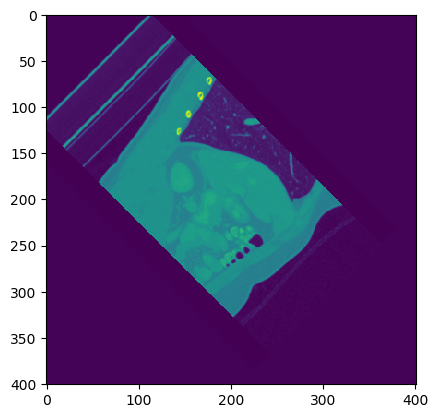

PyObject <matplotlib.image.AxesImage object at 0x000000000258D278>

In [30]:
slice = sample(interp, spacegrid((200, 300, 150), (0, 1, 1), (0, 1, -1), -200:200, -200:200))

imshow(slice)

In [24]:
code_native(sample, (typeof(interp), typeof(spacegrid((0, 0, 0), (1, 1, 1), (1, 0, 0)))), syntax=:intel)

	.text
; ┌ @ In[16]:15 within `sample'
	push	rbp
	mov	rbp, rsp
	push	r15
	push	r14
	push	r13
	push	r12
	push	rsi
	push	rdi
	push	rbx
	and	rsp, -32
	sub	rsp, 256
	vmovaps	xmmword ptr [rbp - 80], xmm6
	mov	rsi, rdx
	vxorps	xmm0, xmm0, xmm0
	vmovaps	ymmword ptr [rsp + 96], ymm0
	mov	qword ptr [rsp + 128], 0
	mov	qword ptr [rsp + 216], rsi
	mov	eax, offset jl_get_ptls_states
	vzeroupper
	call	rax
	mov	rbx, rax
	mov	qword ptr [rsp + 96], 6
	mov	rax, qword ptr [rbx]
	mov	qword ptr [rsp + 104], rax
	lea	rax, [rsp + 96]
	mov	qword ptr [rbx], rax
	mov	rax, qword ptr [rsi]
	mov	qword ptr [rsp + 72], rax
	mov	rsi, qword ptr [rsi + 8]
; │┌ @ broadcast.jl:753 within `materialize'
; ││┌ @ broadcast.jl:255 within `instantiate'
; │││┌ @ broadcast.jl:422 within `combine_axes'
; ││││┌ @ abstractarray.jl:75 within `axes'
; │││││┌ @ array.jl:156 within `size'
	mov	r13, qword ptr [rsi + 24]
	mov	r12, qword ptr [rsi + 32]
; ││││└└
; ││││┌ @ promotion.jl:414 within `axes'
	mov	rax, r13
	sar	rax, 63
	andn	r15

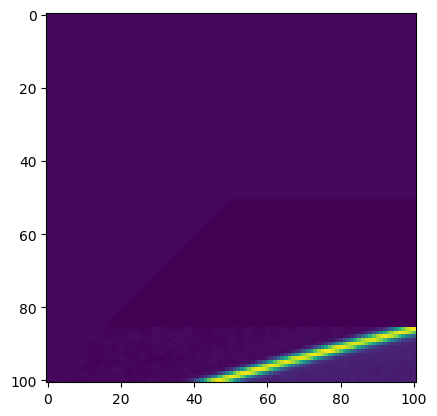

PyObject <matplotlib.image.AxesImage object at 0x00000000024D2BE0>

In [28]:
imshow(sample(interp, spacegrid((0, 0, 0), (1, 1, 1), (1, 0, 0))))

In [22]:
typeof(spacegrid((0, 0, 0), (1, 1, 1), (1, 0, 0)))

Array{SArray{Tuple{3},Float64,1,3},2}

In [23]:
Array{SArray{Tuple{3},Float64,1,3},2}

Array{SArray{Tuple{3},Float64,1,3},2}

In [27]:
isbits(Vec3((7, 9, 8)))

true

In [41]:
function randomVec()
    v = Vec3((rand() - .5, rand() - .5, rand() - .5))
    return v ./ sqrt(sum(v .* v))
end

randomVec (generic function with 1 method)

In [33]:
using Random

In [36]:
rand()

0.7452315203744628

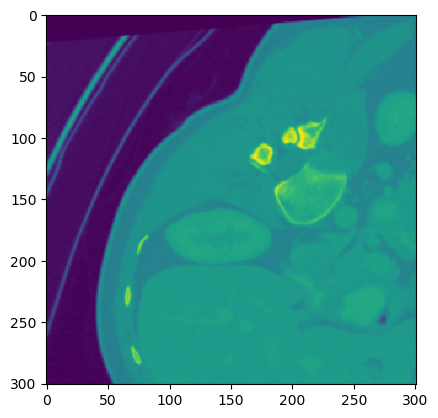

PyObject <matplotlib.image.AxesImage object at 0x0000000049306DA0>

In [134]:
a = randomVec()
b = randomVec()
b = b .- sum(a.*b) .* a
b = b / sum(b .* b)

(x->)

imshow(sample(interp, spacegrid((200, 200, 200), a, b)))

In [166]:
a = img.axes[1]


function center(r::StepRange)
    return Float64((r.start + r.stop)/2)
end
function center(r::StepRangeLen)
    return Float64(r.len * r.step * .5 + r.offset)
end

function norm(x::Vec3)
    return sqrt(sum(x.*x))
end

norm (generic function with 1 method)

In [169]:
function center(img::AxisArray)
    return Vec3((x->center(x.val)).(img.axes))
end
center(img)

3-element SArray{Tuple{3},Float64,1,3}:
  181.0
 -179.0
 -154.5

In [129]:
function cross(a, b)
    return Vec3((a[2]*b[3] - a[3] * b[2], a[3] * b[1] - a[1] * b[3], a[1] * b[2] - a[2] * b[1]))
end

cross (generic function with 1 method)

In [130]:
sum(a .* b)

5.551115123125783e-17

In [131]:
c = cross(a, b)

3-element SArray{Tuple{3},Float64,1,3}:
 -0.3646437515095621 
 -0.8803112844071992 
 -0.45848798140791663

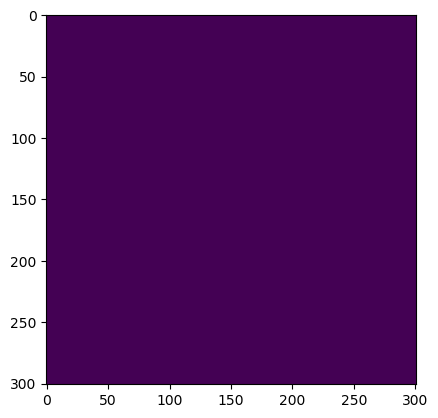

PyObject <matplotlib.image.AxesImage object at 0x00000000460FFC50>

In [183]:
a = randomVec()
b = randomVec()
b = b .- sum(a.*b) .* a
b = b / sum(b .* b)

c = center(img) .+ cross(a, b) .* (rand() - .5) .* norm(center(img))




imshow(sample(interp, spacegrid(c, a, b)))